# Data Scientist Challenge - Compass UOL
Isac Carvalho 03/06/2022


# 1. Problema de Negócio

**Cenário:**

“Você provavelmente já recebeu uma ligação de telemarketing oferecendo um produto que você não precisa. Essa situação de estresse é minimizada quando você oferece um produto que o cliente realmente precisa.”

Obs.: y é a flag de cliente interessado no produto.

**Objetivo:**

Realizar a análise exploratória e a construção de um modelo de classificação com os dados do dataset em anexo.

**Dataset:**

Para o desafio foi fornecido dois datasets em formato csv: `metadata.csv e train.csv`.

In [ ]:
#Carregando dataset metadata
import pandas as pd

dataset_metadata = pd.read_csv('/content/drive/MyDrive/Dataset_caseDS_CompassUOL/metadata.csv')
dataset_metadata.tail()

,Variavel cod,Variavel tipo
65,var65,Quantitativo continua
66,var66,Quantitativo continua
67,var67,Quantitativo discreto
68,var68,Quantitativo discreto
69,y,Quantitativo discreto


In [ ]:
#carregando dataset train
dataset_train = pd.read_csv('/content/drive/MyDrive/Dataset_caseDS_CompassUOL/train.csv')
dataset_train.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1


In [ ]:
#observando todas colunas
pd.set_option('display.max_columns', None)
dataset_train.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1


**Primeiras observações**

O dataset `metadados` é uma espécie de dicionário de dados que informa o `código` e também o `tipo` de cada variável.

Já o dataset `train`, possui as variáveis `id`, as variáveis numeradas como `var1... até var68` e a variável `y`, que traz a flag do cliente interessado no produto.

Dentro do Problema de Negócio, não sabemos o que essas variáveis numeradas como var1 a var68 representam de fato, mas vamos supor que são dados relacionados ao cliente.

Na variável `y` por ser uma flag de cliente interessado no produto, vamos considerar `0` como não interessado e `1` como interessado.

Vale ressaltar que a falta de uma descrição das variáveis e do contexto de negócio em que elas se aplicam, faz com que temos uma análise mais genérica, pois ter informações sobre o contexto do problema de negócio ajuda na interpretabilidade dos dados. Deste modo, devido a forma como o dataset está representado, todo o trabalho realizado no desafio será puramente baseado nos dados.



# 2. Análise Exploratória de Dados

Vamos começar conhecendo um pouco melhor o dataset `metadata`.

**Dataset Metadata**

In [ ]:
#conhecendo o dataset
dataset_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Variavel cod   70 non-null     object
 1   Variavel tipo  70 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


O dataset `metadata` possui 2 colunas e 70 linhas. A primeira coluna `Varivel cod` traz o nome da variável e a segunda `Variavel tipo` traz o tipo na qual ela pertence.

Vamos verificar quais tipos de variáveis o dataset nos traz.



In [ ]:
#agrupando por variavel tipo
dataset_metadata.groupby('Variavel tipo')[['Variavel tipo']].count()

,Variavel tipo
Variavel tipo,
Qualitativo nominal,36
Qualitativo ordinal,4
Quantitativo continua,12
Quantitativo discreto,18


Aqui podemos ver a quantidade de variáveis para cada tipo. Das 70 variáveis, 40 são qualitativas e 30 são quantitativas. Vamos focar nas variáveis qualitativas consideradas como `Qualitativo nominal` e `Qualitativo ordinal`, porque são as nossas variáveis categóricas.

Precisamos saber quais são as nossas variáveis qualitativas (categóricas).

In [ ]:
#filtrando por categoria
metadata_id=dataset_metadata['Variavel cod']==('id')
metadata_nominal=dataset_metadata['Variavel tipo']==('Qualitativo nominal')
metadata_ordinal=dataset_metadata['Variavel tipo']==('Qualitativo ordinal')

metadata_id = dataset_metadata[metadata_id]
metadata_nominal = dataset_metadata[metadata_nominal]
metadata_ordinal = dataset_metadata[metadata_ordinal]

#unindo tabelas
metadata_mergex = pd.merge(metadata_id, metadata_nominal, how = 'outer')
metadata_qualitativa = pd.merge(metadata_mergex, metadata_ordinal, how = 'outer')

print(metadata_qualitativa)

   Variavel cod        Variavel tipo
0            id  Qualitativo nominal
1          var1  Qualitativo nominal
2          var2  Qualitativo nominal
3          var3  Qualitativo nominal
4          var4  Qualitativo nominal
5          var5  Qualitativo nominal
6          var6  Qualitativo nominal
7          var7  Qualitativo nominal
8          var8  Qualitativo nominal
9          var9  Qualitativo nominal
10        var10  Qualitativo nominal
11        var11  Qualitativo nominal
12        var12  Qualitativo nominal
13        var13  Qualitativo nominal
14        var14  Qualitativo nominal
15        var15  Qualitativo nominal
16        var16  Qualitativo nominal
17        var17  Qualitativo nominal
18        var18  Qualitativo nominal
19        var19  Qualitativo nominal
20        var20  Qualitativo nominal
21        var21  Qualitativo nominal
22        var22  Qualitativo nominal
23        var23  Qualitativo nominal
24        var28  Qualitativo nominal
25        var29  Qualitativo nominal
2

Agora que já sabemos quais são nossas variáveis qualitativas, vamos salvá-las em listas para podermos usá-las depois.

In [ ]:
#criando lista

metadata_qualitativa_list = list(metadata_qualitativa['Variavel cod'])

print(metadata_qualitativa_list)

['id', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var28', 'var29', 'var30', 'var31', 'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var41', 'var26', 'var32', 'var42', 'var43']


Agora precisamos saber quais são as nossas variáveis quantitativas (métricas). Vamos ver as variáveis consideradas como `Quantitativo continua` e `Quantitativo discreto`.

Observação: Vamos incluir a variável qualitativa `id` para servir de referência.

In [ ]:
#filtrando por categoria

metadata_id=dataset_metadata['Variavel cod']==('id')
metadata_continua=dataset_metadata['Variavel tipo']==('Quantitativo continua')
metadata_discreto=dataset_metadata['Variavel tipo']==('Quantitativo discreto')

metadata_id = dataset_metadata[metadata_id]
metadata_continua = dataset_metadata[metadata_continua]
metadata_discreto = dataset_metadata[metadata_discreto]

#unindo tabelas
metadata_mergey = pd.merge(metadata_id, metadata_continua, how = 'outer')
metadata_quantitativa = pd.merge(metadata_mergey, metadata_discreto, how = 'outer')


print(metadata_quantitativa)

   Variavel cod          Variavel tipo
0            id    Qualitativo nominal
1         var55  Quantitativo continua
2         var56  Quantitativo continua
3         var57  Quantitativo continua
4         var58  Quantitativo continua
5         var59  Quantitativo continua
6         var60  Quantitativo continua
7         var61  Quantitativo continua
8         var62  Quantitativo continua
9         var63  Quantitativo continua
10        var64  Quantitativo continua
11        var65  Quantitativo continua
12        var66  Quantitativo continua
13        var24  Quantitativo discreto
14        var25  Quantitativo discreto
15        var27  Quantitativo discreto
16        var40  Quantitativo discreto
17        var44  Quantitativo discreto
18        var45  Quantitativo discreto
19        var46  Quantitativo discreto
20        var47  Quantitativo discreto
21        var48  Quantitativo discreto
22        var49  Quantitativo discreto
23        var50  Quantitativo discreto
24        var51  Quantita

Agora que já sabemos quais são nossas variáveis quantitativas, vamos salvá-las em listas para podermos usá-las depois.

In [ ]:
#criando lista
metadata_quantitativa_list = list(metadata_quantitativa['Variavel cod'])

print(metadata_quantitativa_list)

['id', 'var55', 'var56', 'var57', 'var58', 'var59', 'var60', 'var61', 'var62', 'var63', 'var64', 'var65', 'var66', 'var24', 'var25', 'var27', 'var40', 'var44', 'var45', 'var46', 'var47', 'var48', 'var49', 'var50', 'var51', 'var52', 'var53', 'var54', 'var67', 'var68', 'y']


**Dataset Train**

A partir daqui vamos focar no dataset `train`. Vamos começar conhecendo todas as informações do nosso dataset.

In [ ]:
#conhecendo o dataset
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14123 entries, 0 to 14122
Data columns (total 70 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      14123 non-null  int64  
 1   var1    14123 non-null  int64  
 2   var2    14123 non-null  int64  
 3   var3    14123 non-null  int64  
 4   var4    14123 non-null  int64  
 5   var5    14123 non-null  int64  
 6   var6    14123 non-null  int64  
 7   var7    14123 non-null  int64  
 8   var8    14123 non-null  int64  
 9   var9    14123 non-null  int64  
 10  var10   14123 non-null  int64  
 11  var11   14123 non-null  int64  
 12  var12   14123 non-null  int64  
 13  var13   14123 non-null  int64  
 14  var14   14123 non-null  int64  
 15  var15   14123 non-null  int64  
 16  var16   14123 non-null  int64  
 17  var17   14123 non-null  int64  
 18  var18   14123 non-null  int64  
 19  var19   14123 non-null  int64  
 20  var20   14123 non-null  int64  
 21  var21   14123 non-null  int64  
 22

O dataset `train` possui 70 colunas e 14123 linhas. As variáveis são numéricas do tipo `float e int`.

Vamos confirmar se temos dados nulos e verificar se a variável `id` possui registros únicos.

In [ ]:
#confirmando se há dados nulos
dataset_train.isnull().sum().sum()

0

In [ ]:
#contando id's únicos
len(set(dataset_train.id))

14123

Podemos ver que não temos dados nulos. Também podemos ver que temos 1 `id` para cada linha do dataset, ou seja, temos 14123 usuários únicos.

Agora vamos verificar a quantidade de usuários que não estão interessados(0) e os usuários que estão interessados(1), agrupando por categorias da variável `y`.

In [ ]:
#agrupando por categoria
dataset_train.groupby('y')[['id']].count()

,id
y,
0,11273
1,2850


Podemos observar que temos 11273 usuários que não estão interessados(0) e 2850 usuários que estão interessados(1).

Podemos verificar a proporção dos dois grupos em relação ao total de usuários.

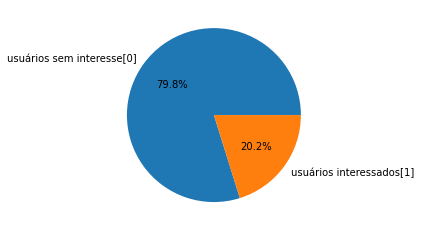

In [ ]:
#importando matplotlib
import matplotlib.pyplot as plt

#criando gráfico de setores
pizza_train = dataset_train.groupby('y')[['id']].count()
pizza_train = pizza_train.id

labels = ['usuários sem interesse[0]', 'usuários interessados[1]'] 

plt.pie(pizza_train, labels = labels, autopct='%1.1f%%')
plt.show()

Os usuários sem interesse (11273), correspondem uma fatia 79,8% do total de usuários. Já os usuários interessados (2850), correspondem a uma fatia de 20,2% do total de usuários.

Agora podemos ver um resumo das principais estatísticas do nosso dataset.

In [ ]:
#incluindo todas colunas
pd.set_option('display.max_columns', None)
#resumo das estatísticas
dataset_train.describe()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
count,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000,14123.000000
mean,17474.649366,9.712667,23.966579,1584.671245,15179.176025,5543.697869,1315.314168,-109.713729,-138.426680,-106.362388,-118.986688,13342.299865,3430.081144,1355.395454,19.480988,-65.831056,-65.180415,-84.422856,-93.522835,1059.038590,19.793670,1394.820435,3.478581,2.532890,0.958649,2.093181,-106.185867,0.370035,19.237485,3.644127,1.386887,0.036395,13.714508,3.141967,26.603413,394.255045,14.331162,7.585640,1.867025,3.592509,6.010338,3.096651,24.737025,6.855059,0.865751,0.275225,0.221624,0.049848,0.106068,0.343695,0.148340,0.055300,-85.239114,1.635276,1.519224,0.216031,-111.822517,-112.092123,-111.022124,-154.157900,-458.540340,-24.210294,0.073086,0.779221,0.028778,-862.721979,-862.762111,-41.252803,-2.154825,0.201798
std,10249.066602,7.269559,218.429664,1118.101765,9994.295223,3329.493664,1210.074896,350.202420,371.128392,311.608454,392.409936,9849.807542,3079.899094,642.799261,7.511958,307.502580,307.691935,300.502638,297.389385,537.377623,7.590808,688.872118,1.813111,1.112159,0.915563,1.388681,315.879767,0.482831,8.278536,1.062332,0.556791,0.187276,4.953779,1.992664,18.793208,181.868748,12.484156,8.723957,4.066404,1.006279,4.783179,1.029761,3.432140,4.048218,0.340932,0.914687,0.803367,0.269135,0.487567,0.474957,0.355449,0.228573,319.246246,0.749654,0.714010,0.022642,315.671274,315.799354,314.158769,361.158606,497.945633,154.485314,0.053963,0.234068,0.018681,342.956927,342.855920,199.275514,48.244171,0.401357
min,1.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,0.004267,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,8550.500000,4.000000,38.000000,731.000000,6493.500000,2374.000000,482.000000,16.000000,10.000000,1.000000,14.000000,4525.500000,914.000000,811.000000,13.000000,2.000000,3.000000,3.000000,3.000000,586.000000,13.000000,796.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,15.000000,4.000000,1.000000,0.000000,10.000000,1.000000,10.000000,255.000000,2.000000,1.000000,0.000000,4.000000,2.000000,3.000000,23.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000,1.00

Aqui podemos ver a contagem de registros em cada variável, a média, Desvio Padrão, valor mínimo, 1º quartil, mediana, 3º quartil e valor máximo.

Com excessões das variáveis `id` e `y`, as demais variáveis não sabemos o que elas representam de fato, por falta dessas informações o resumo estatístico dessas variáveis não nos ajuda entender se o dataset posssui dados com ruídos.

**Outliers**

Podemos também investigar outliers através do gráfico de boxplot.

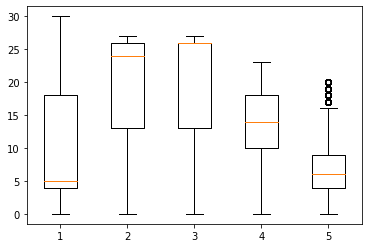

In [ ]:
#Verificando Outliers
#criando gráfico boxplot
boxplot_train1 = dataset_train.var1
boxplot_train2 = dataset_train.var14
boxplot_train3 = dataset_train.var20
boxplot_train4 = dataset_train.var32
boxplot_train5 = dataset_train.var43

boxplot = [boxplot_train1,boxplot_train2,boxplot_train3,boxplot_train4,boxplot_train5]

plt.boxplot(boxplot)
plt.show()

Pegando 5 variáveis aleatórias (`var1,var14,var20,var32,var43`) do dataset `train` para visualizarmos no gráfico de boxplot, somente o boxplot nº5 (`var43`) apresentou outliers.

Podemos criar um boxplot somente com a variável `var43` para visualizarmos um pouco melhor.

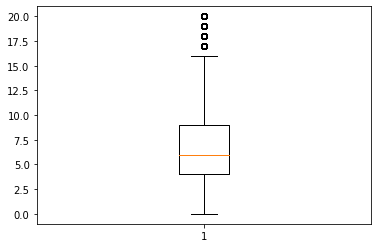

In [ ]:
#criando gráfico boxplot
boxplot_train_var43 = dataset_train.var43

plt.boxplot(boxplot_train_var43)
plt.show()

Podemos ver que o valor máximo sem considerar outlier está aproximadamente em 16. Agora podemos ver quantas linhas com outliers temos no total.

In [ ]:
#importando biblioteca
from numpy.ma.core import count
import numpy as np

#contando linhas com outliers do dataset
qtde_outliers = np.array(np.where(dataset_train['var43']>16))

count(qtde_outliers.tolist())

435

Podemos ver que na variável `var43` em um total de 14123 linhas, 435 são outliers.

Vale ressaltar que para determinarmos outliers devemos apenas levar em conta variáveis quantitativas, o que não foi levado em consideração no exemplo acima.

Podemos verificar outliers em todo dataset usando o teste Z-Score. Porém, antes de mais nada, devemos selecionar apenas as variáveis quantitativas do nosso dataset.

In [ ]:
#filtrando variáveis a partir da lista *metadata_quantitativa_list*
dataset_train_metrics = dataset_train[metadata_quantitativa_list]

dataset_train_metrics.head()

,id,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var24,var25,var27,var40,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var67,var68,y
0,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0,4,0,9,1,4,3,1,0,0,0,0,42,1,1,0.132353,0.139706,1
1,8,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,2,1,1,7,0,0,0,0,0,0,0,0,20,1,1,0.147059,0.106618,0
2,30,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,2,1,0,3,1,0,0,0,0,0,0,0,12,1,1,0.382353,0.242647,0
3,43,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0,0,1,10,1,1,1,0,1,1,0,0,36,1,1,0.147059,0.132353,0
4,46,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,2,1,1,5,1,0,0,0,0,1,0,0,19,1,1,0.455882,0.132353,1


**Teste Z-Score**

O teste Z-Score é o número de desvios padrão em relação à média de dos nossos dados. Vamos considerar o valor de *3 Desvios Padrão* no Z-Score como limite para considerarmos um outlier.

In [ ]:
#teste Z-Score
#importando scipy
from scipy import stats

#Calculando Z-Score em valor absoluto
z = np.abs(stats.zscore(dataset_train_metrics))
print(z)

[[1.7049619  0.15976397 0.35468378 ... 0.20768543 0.04756248 1.98882845]
 [1.70427888 0.56324534 0.3552255  ... 0.20775923 0.0468766  0.50280858]
 [1.70213227 0.50328401 0.35492455 ... 0.20894002 0.04969631 0.50280858]
 ...
 [1.73937613 0.08449112 0.35434164 ... 0.20901382 0.04794352 0.50280858]
 [1.73966885 0.29571185 0.35473764 ... 0.20834963 0.04733385 0.50280858]
 [1.73986399 0.5383829  0.35600482 ... 0.20790683 0.04733385 0.50280858]]


In [ ]:
#Filtrando Outliers do Dataset
#definindo limite z-score (3dp)
threshold = 3
outlierz=(np.where(z > 3))
outlierz = np.array(outlierz)

#criando a tabela 'outlierz'
outlierz = pd.DataFrame(outlierz)

zscore = ['A','B']
outlierz.insert(0, 'zscore', zscore)
outlierz.head()

zscore   0   1   2  3   4   5   6   7   8   9  10  11  12  13  14  15  16  \
0      A   0   0   0  1   5   6   7  23  24  26  27  42  44  44  45  46  52   
1      B  18  19  20  7  28  24  28   8  10   8  28  28   8  10  28   1  28   

   17  18  19  20  21  22  23  24  25  26   27   28   29   30   31   32   33  \
0  56  70  70  71  83  88  90  90  97  99  101  106  107  116  120  125  127   
1  19  10  24  28  24  20  20  24   1  24   29   28   24   24   24   28    1   

    34   35   36   37   38   39   40   41   42   43   44   45   46   47   48  \
0  127  127  133  138  140  143  143  145  150  158  159  174  175  183  188   
1    8    9   20   21   20    9   24   19   20   24   21   28    7   24   18   

    49   50   51   52   53   54   55   56   57   58   59   60   61   62   63  \
0  188  188  188  190  196  196  200  201  201  202  202  203  204  208  210   
1   19   20   21   28    8   10   10   10   24   18   19   28   24    7    9   

    64   65   66   67   68   69   70   71   72   73   74   75   76   77   78  \
0  210  212  221  222  222  223  224  224  227  231  231  234  237  240  241   
1   20    1    8    9   10   24   19   21    8    8   10    9   28   28   24   

    79   80   81   82   83   84   85   86   87   88   89   90   91   92   93  \
0  250  252  257  259  264  269  272  272  272  282  282  282  282  283  286   
1   24   20    9   24   19   28    1    8   10   18   19   20   21    1   24   

    94   95   96   97   98   99  100  101  102  103  104  105  106  107  108  \
0  287  288  289  290  295  295  297  299  303  307  309  310  312  313  314   
1   20   28   28    7    8   10   28   28   28    7   20   24   28   28   28   

   109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  \
0  316  317  322  323  327  335  337  337  345  349  351  354  359  361  363   
1    9    9   20    7    1    7    7   28    7    9    1    9   20   20   10   

   124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  \
0  368  371  372  373  376  381  382  390  391  392  394  394  399  405  409   
1   10   28   24    7   21   28    9    7   24   28    1   10    1   28    7   

   139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  \
0  409  418  419  422  427  427  427  434  434  441  443  443  448  451  454   
1    8   24   24   28   18   19   20   19   21   28    7   24   20   28   28   

   154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  \
0  456  457  457  462  462  462  463  468  468  468  469  473  473  474  478   
1   28   19   21   18   19   21   20    8    9   10    7    8   24   20   24   

   169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  \
0  479  485  486  488  489  489  489  490  500  500  503  506  507  507  510   
1   24    1   21    7   18   19   20    7    9   28    7   24   18   19   20   

   184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  \
0  513  515  515  517  517  517  517  518  518  520  520  524  527  527  527   
1   24    1    8    1   18   19   20   20   21    1   28    1   18   19   24   

   199  200  201  202  203  204  205  206  207  208  209  210  211  212  213  \
0  528  530  538  539  539  560  560  567  569  569  571  576  584  584  584   
1    1   20    9   18   19    1   24    7    8   10   19   28   18   19   21   

   214  215  216  217  218  219  220  221  222  223  224  225  226  227  228  \
0  586  586  595  596  598  605  619  630  637  637  648  660  662  670  673   
1   20   21    7   20   20   24   24    7    8   10   28   28   28    9   24   

   229  230  231  232  233  234  235  236  237  238  239  240  241  242  243  \
0  692  695  695  699  700  702  703  705  705  705  706  709  711  711  719   
1   24   20   28    7   24   20   28    1    8   10   20   24   19   21   28   

   244  245  246  247  248  249  250  251  252  253  254  255  256  257  258  \
0  723  723  723  730  731  734  737  737  747  750  752  752  752  7

Observando a tabela acima `outlierz`, na variável `zscore` temos as categorias `A` e `B`, que são a posição(coordenada) do outlier. A categoria `A` representa a linha da tabela `dataset_train_metrics`. Já a categoria `B` representa a coluna da mesma tabela.

Para entendermos melhor podemos ver as posições em `zscore` na categoria `B` das colunas `0`, `1` e `2` da tabela `outlierz`.

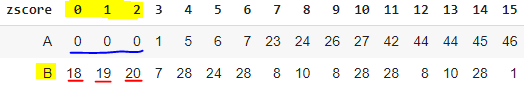

Nestas posições na categoria `B`[`18,19,20`] em `zcore` que nos indica as colunas e na categoria `A`[`0,0,0`] em `zscore` temos a linha da tabela `dataset_train_metrics`.

Podemos verificar verificar o valor de Z-score destas 3 posições.


In [ ]:
#verificando valor z-score
print(z[0][18],z[0][19],z[0][20])

4.072330202755933 3.458536886328118 3.5305190676226044


Como era esperado, as 3 posições passaram do valor de limite do z-score que é de *3 desvios padrão*.

Para entendermos melhor podemos visualizar através do gráfico de densidade.

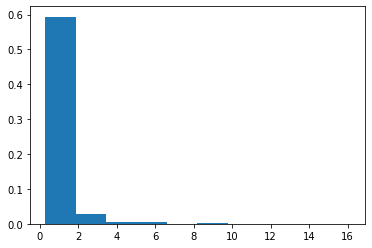

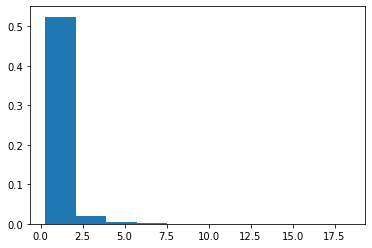

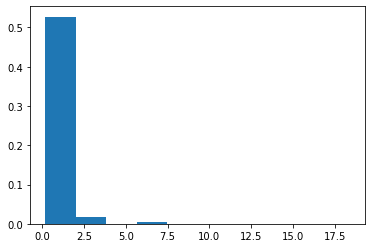

In [ ]:
#arredondando valores
zteste = round(pd.DataFrame(z),2)

#criando histogramas
plt.hist(zteste[18],density=True)
plt.show()
plt.hist(zteste[19],density=True)
plt.show()
plt.hist(zteste[20],density=True)
plt.show()

Podemos confirmar que nos histogramas mostram a densidade das 3 posições. Nos três gráficos (18,19 e 20 respectivamente), no eixo x dos três gráficos indicam que passaram do valor de 3 desvios padrão.

Agora podemos ver qual `id` e quais variáveis essas posições pertencem.

In [ ]:
#filtrando linha e colunas específicas
dataset_train_metrics.iloc[[0],[0,18,19,20]]

,id,var45,var46,var47
0,1,4,3,1


Podemos ver que as 3 variáveis são (`var45,var46,var47`), o `id` 1 e o valor do outlier de cada posição. Podemos usar também o gráfico boxplot para ter uma visão geral.

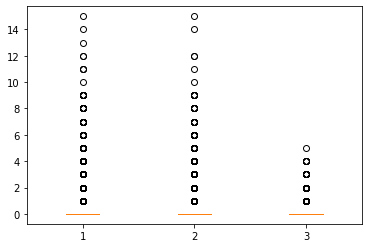

In [ ]:
#criando gráfico boxplot
boxplot_train1 = dataset_train_metrics.var45
boxplot_train2 = dataset_train_metrics.var46
boxplot_train3 = dataset_train_metrics.var47

boxplot = [boxplot_train1,boxplot_train2,boxplot_train3]

plt.boxplot(boxplot)
plt.show()

Vale ressaltar que poderíamos entender melhor o motivo destes outliers investigando mais a fundo, porém como não sabemos o que representam essas variáveis não será possível analisar cada variável individualmente.

Agora podemos verificar todos as linhas em nosso dataset que possuem outliers. Vamos voltar a nossa tabela `outlierz`.

In [ ]:
#transpondo tabela outlierz
outlierz_count = outlierz.transpose()

#subindo cabeçalho
outlierz_count = outlierz_count.rename(columns=outlierz_count.iloc[0])
outlierz_count = outlierz_count.drop(outlierz_count.index[0])

#agrupando índice
outlierz_count = outlierz_count.groupby('A')[['B']].count()
outlierz_count

,B
A,
0,3
1,1
5,1
6,1
7,1
...,...
14109,1
14110,2
14116,1


In [ ]:
#contando linhas
len(outlierz_count.index)

3312

Agora podemos ver todas as linhas [`coluna A`] e a quantidade de variáveis [`coluna B`] que possuem outliers. Podemos ver também o total de linhas com outliers, que seria 3312.

Apesar de termos 14123 linhas no dataset `train`, eliminar estes 3312 registros com outliers seria uma perda consideravel de dados. Ante de decidir o que faremos com outliers de fato, vamos analisar a quantidade de outliers em relação a variável `y`.

In [ ]:
#filtrando variáveis a partir da lista

#filtrando por categoria
dataset_train_metrics0 = dataset_train_metrics['y']==(0)
dataset_train_metrics1 = dataset_train_metrics['y']==(1)
dataset_train_metrics0 = dataset_train_metrics[dataset_train_metrics0]
dataset_train_metrics1 = dataset_train_metrics[dataset_train_metrics1]

#dataset y=0
dataset_train_metrics0.head()

,id,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var24,var25,var27,var40,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var67,var68,y
1,8,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.00000,-999.00000,2,1,1,7,0,0,0,0,0,0,0,0,20,1,1,0.147059,0.106618,0
2,30,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.00000,-999.00000,2,1,0,3,1,0,0,0,0,0,0,0,12,1,1,0.382353,0.242647,0
3,43,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.36337,0.00201,0,0,1,10,1,1,1,0,1,1,0,0,36,1,1,0.147059,0.132353,0
5,65,0.221367,0.497,0.101075,0.026035,-999.000000,0.057837,0.391608,0.080977,0.897074,0.019915,-999.00000,-999.00000,0,0,0,2,1,0,0,0,0,1,0,0,15,1,1,-999.000000,0.198529,0
6,69,0.205834,0.014,1.000000,0.007534,0.141888,-999.000000,0.145790,0.035340,0.867810,0.014831,-999.00000,-999.00000,0,1,0,2,1,0,0,0,0,0,0,1,30,1,1,0.514706,0.224265,0


In [ ]:
#dataset y=1
dataset_train_metrics1.head()

,id,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var24,var25,var27,var40,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var67,var68,y
0,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0,4,0,9,1,4,3,1,0,0,0,0,42,1,1,0.132353,0.139706,1
4,46,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,2,1,1,5,1,0,0,0,0,1,0,0,19,1,1,0.455882,0.132353,1
11,115,0.208391,0.061,0.978495,0.015404,0.094288,-999.000000,0.129989,0.034083,0.895055,0.015649,-999.000000,-999.00000,2,3,0,1,1,0,0,0,0,0,0,0,42,1,1,0.250000,0.242647,1
14,132,0.203010,-999.000,-999.000000,-999.000000,-999.000000,-999.000000,0.169461,0.065909,0.900101,0.016160,-999.000000,-999.00000,0,2,0,0,0,0,0,0,0,0,0,0,-999,0,0,0.250000,0.231618,1
15,145,0.202450,0.154,0.833333,0.026590,0.087877,0.083077,0.132534,0.002890,0.919273,0.004765,-999.000000,-999.00000,2,0,1,0,1,0,0,0,0,0,0,0,18,1,1,0.235294,0.194853,1


Agora que temos as tabelas de cada categoria vamos ver o quanto os outliers influenciam em cada grupo(y=0 e y=1).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#Calculando Z-Score em valor absoluto [y=0 e y=1]
z_0 = np.abs(stats.zscore(dataset_train_metrics0))
z_1 = np.abs(stats.zscore(dataset_train_metrics1))

#Filtrando Outliers
#definindo limite z-score (3dp)
threshold = 3
outlierz_0=(np.where(z_0 > 3))
outlierz_0 = np.array(outlierz_0)

outlierz_1=(np.where(z_1 > 3))
outlierz_1 = np.array(outlierz_1)

#criando a tabela
outlierz_0 = pd.DataFrame(outlierz_0)
outlierz_1 = pd.DataFrame(outlierz_1)

zscore = ['A','B']
outlierz_0.insert(0, 'zscore', zscore)
outlierz_1.insert(0, 'zscore', zscore)

#transpondo tabela
outlierz_count_0 = outlierz_0.transpose()
outlierz_count_1 = outlierz_1.transpose()


#subindo cabeçalho
outlierz_count_0 = outlierz_count_0.rename(columns=outlierz_count_0.iloc[0])
outlierz_count_0 = outlierz_count_0.drop(outlierz_count_0.index[0])
outlierz_count_1 = outlierz_count_1.rename(columns=outlierz_count_1.iloc[0])
outlierz_count_1 = outlierz_count_1.drop(outlierz_count_1.index[0])


#agrupando índice
outlierz_count_0 = outlierz_count_0.groupby('A')[['B']].count()
outlierz_count_1 = outlierz_count_1.groupby('A')[['B']].count()

#contando linhas com outlier
outlier_y0 = len(outlierz_count_0.index)
outlier_y1 = len(outlierz_count_1.index)

#total de linhas do grupo
linhas_y0 = len(dataset_train_metrics0.index)
linhas_y1 = len(dataset_train_metrics1.index)

#percentual de influência do outlier no grupo
influencia_outlier_y0 = round((outlier_y0/linhas_y0)*100,2)
influencia_outlier_y1 = round((outlier_y1/linhas_y1)*100,2)

#criando tabela com os resultados
pd.DataFrame(data=[[linhas_y0,outlier_y0,influencia_outlier_y0],
                   [linhas_y1,outlier_y1,influencia_outlier_y1]],
             index=['y=0','y=1'],
             columns = ['total_linhas','linhas_outlier','influencia_outlier%'])


,total_linhas,linhas_outlier,influencia_outlier%
y=0,11273,2573,22.82
y=1,2850,1133,39.75


Podemos ver que os outliers possuem uma influência considerável nos dois grupos, principalmente no grupo '*clientes interessados no produto*', mais conhecidos por '*y=1*', com quase 40% dos registros.

Temos um indicativo que os outliers possuem uma forte correlação com o fato do cliente estar interessado no produto.

#3. Pré-Processamento dos Dados
Vamos preparar nosso dataset para a modelagem de dados.

**Dados nulos e faltantes**

Não temos dados nulos ou faltantes, então não há necessidade de tratar esses dados.

**Dados com ruídos**

Não temos o conhecimento do contexto de negócio das variáveis, bem como, o que elas representam. Deste modo não é possível identificar dados com ruídos.

**Variáveis categóricas**

Como o nosso dataset `train` possui variáveis categóricas que são representadas por caracteres numéricos e que já estão classificadas como tipo numérico, não temos necessidade de tratar esses dados.

**Outliers**

Apesar de usarmos um limite alto de Z-Score(*3 desvios padrão*), tivemos um grande número de registros que foram detectados como outliers. Não vamos excluí-los, pois seria uma perda considerável de dados. Também não vamos suavizá-los usando a mediana por exemplo, a suavização desses outliers poderia interferir no aprendizado do nosso classificador, pois os mesmos possuem grande influência na métrica que queremos prever(`y`). Por conta disso, não vamos tratar os outliers do nosso dataset.

**Normalização**

Como vamos usar um modelo de classificador usando Regressão Logística, a normalização pode não gerar um impacto expressivo, porém, como temos variáveis categóricas com diferentes intervalos a normalização pode ajudar no desempenho do modelo.

In [ ]:
#dataset original
dataset_train.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1
1,8,4,110,1986,13684,7189,-999,-999,17,3,63,13989,497,2289,16,1,3,3,3,1797,16,2417,5,1,2,1,6,1,4,2,1,0,14,0,1,532,2,1,0,4,7,3,30,3,0,0,0,0,0,0,0,0,20,1,1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0
2,30,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1


Vamos usar dois tipos de métodos de normalização. O primeiro método a ser usado é *Normalização Mín-Máx*, esse método não faz tratamento de outliers. O segundo método a ser usado é *Normalização Z-Score*, esse método faz tratamento de outliers.

Vamos treinar dois modelos, onde cada um deles vai usar um dataset normalizado com um método diferente. O objetivo é validar a nossa hipótese: se os outliers influenciam ou não na métrica que queremos prever.

In [ ]:
#aplicando método Normalização Mín-Máx
dataset_train_norm_mm = dataset_train.copy() 
for column in dataset_train_norm_mm.columns: 
    dataset_train_norm_mm[column] = ((dataset_train_norm_mm[column] - dataset_train_norm_mm[column].min()) /
    (dataset_train_norm_mm[column].max() - dataset_train_norm_mm[column].min()))   

#dataset com dados normalizados
dataset_train_norm_mm.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,0.000000,0.600000,0.902482,0.847525,0.911353,0.121868,0.85850,0.999034,0.000000,1.000000,0.979705,0.235326,0.220941,0.872988,0.962963,0.939647,0.937790,0.979631,0.998010,0.858014,0.962963,0.848871,0.2,0.75,0.0,1.00,0.997027,0.0,0.888889,0.8,1.0,0.0,0.695652,0.500000,0.647059,0.664748,0.818182,0.035714,0.000000,0.8,0.45,0.333333,0.800000,0.30,1.0,0.266667,0.200000,0.2,0.000000,0.0,0.0,0.0,0.979304,0.333333,0.333333,0.282895,0.999137,0.999833,0.999038,0.999144,0.999311,0.999207,0.068904,0.632694,0.051649,0.999253,0.999006,0.999221,0.999140,1.0
1,0.000198,0.133333,0.983156,0.656766,0.439584,0.632111,0.00000,0.000000,0.989289,1.000000,0.979705,0.470463,0.152669,0.995650,0.592593,0.928505,0.930362,0.971872,0.997015,0.996672,0.592593,0.992197,1.0,0.25,1.0,0.25,0.996036,1.0,0.148148,0.4,0.5,0.0,0.608696,0.000000,0.014706,0.764029,0.060606,0.017857,0.000000,0.8,0.35,0.333333,0.966667,0.15,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.958608,0.333333,0.333333,0.304696,0.999308,0.999305,0.999069,0.999335,0.000000,0.000000,0.087122,0.773966,0.039278,0.000000,0.000000,0.999235,0.999107,0.0
2,0.000821,0.000000,0.920213,0.444004,0.336237,0.059615,0.44750,0.980676,0.000000,1.000000,0.979705,0.337058,0.159302,0.278817,0.370370,0.959146,0.959146,0.978661,0.998010,0.283417,0.370370,0.272279,1.0,0.75,1.0,0.25,0.997027,0.0,0.111111,0.8,0.5,0.0,0.478261,0.166667,0.044118,0.115108,0.787879,0.053571,0.000000,0.8,0.15,0.333333,0.733333,0.25,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.951082,0.333333,0.333333,0.272537,0.999213,0.999452,0.999019,0.999301,0.000000,0.999266,0.062645,0.980827,0.037245,0.000000,0.000000,0.999471,0.999243,0.0
3,0.001190,0.666667,0.920213,0.605061,0.110413,0.724083,0.51025,0.977778,0.982473,0.998004,0.934502,0.122073,0.769466,0.352762,0.296296,0.982358,0.983287,0.991271,0.999005,0.346090,0.296296,0.344148,0.0,0.00,0.0,0.00,0.991080,1.0,0.703704,0.2,1.0,0.0,0.347826,0.000000,0.161765,0.594245,0.818182,0.000000,0.000000,0.8,0.50,0.333333,0.700000,0.50,1.0,0.066667,0.066667,0.0,0.111111,1.0,0.0,0.0,0.973659,0.333333,0.333333,0.277415,0.999716,0.999101,0.999205,0.999436,0.000000,0.999417,0.054367,0.951564,0.050682,0.999363,0.999002,0.999235,0.999132,0.0
4,0.001275,0.233333,0.924645,0.717492,0.910933,0.530291,0.32575,0.980676,0.000000,1.000000,0.979705,0.456400,0.840596,0.113093,0.370370,0.978644,0.979573,0.988361,0.999005,0.783694,0.370370,0.110472,0.4,0.75,1.0,0.25,0.998018,1.0,0.111111,0.8,0.5,0.0,0.739130,0.666667,0.044118,0.814388,0.242424,0.053571,0.066667,0.8,0.25,0.333333,0.833333,0.25,1.0,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.957667,0.333333,0.333333,0.296855,0.999596,0.999101,0.999140,0.999276,0.999021,0.999291,0.072560,0.906155,0.042980,0.000000,0.000000,0.999544,0.999132,1.0


In [ ]:
#aplicando método Normalização Z-Score
dataset_train_norm_zs = dataset_train.copy() 
for column in dataset_train_norm_zs.columns: 
    dataset_train_norm_zs[column] = (dataset_train_norm_zs[column] -
                           dataset_train_norm_zs[column].mean()) / dataset_train_norm_zs[column].std()     
dataset_train_norm_zs.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,-1.704902,1.140005,-0.022738,1.134359,1.427097,-1.248748,0.925303,0.413229,-2.318802,0.350961,0.463767,-0.694866,-0.735115,1.013698,0.867818,0.256359,0.247587,0.317544,0.327930,0.908042,0.817611,0.977220,-1.367032,0.420003,-1.047059,1.373115,0.358319,-0.766386,0.575285,0.334993,1.101155,-0.194336,0.461363,-0.071245,0.925685,0.377992,1.014793,-0.640265,-0.459134,0.404949,0.625037,-0.093858,0.076621,-0.211219,0.393771,4.072186,3.458414,3.530394,-0.217546,-0.723633,-0.41733,-0.241936,0.398561,-0.847425,-0.727195,-0.159758,0.354671,0.357586,0.353515,0.427003,0.921490,0.157637,-0.313921,-0.625999,-0.252845,2.516279,2.516416,0.207678,0.047561,1.988758
1,-1.704219,-0.785834,0.393872,0.358938,-0.149603,0.494160,-1.912538,-2.539349,0.418795,0.350961,0.463767,0.065656,-0.952330,1.452405,-0.463393,0.217335,0.221587,0.290922,0.324567,1.373264,-0.499772,1.483845,0.839121,-1.378301,1.137388,-0.787208,0.355154,1.304733,-1.840601,-1.547658,-0.694851,-0.194336,0.057631,-1.576767,-1.362376,0.757387,-0.987745,-0.754891,-0.459134,0.404949,0.206905,-0.093858,1.533438,-0.952285,-2.539367,-0.300895,-0.275869,-0.185215,-0.217546,-0.723633,-0.41733,-0.241936,0.329649,-0.847425,-0.727195,0.563225,0.355213,0.355914,0.353616,0.427532,-1.085379,-6.309918,-0.038822,-0.022450,-0.506542,-0.397362,-0.397362,0.207752,0.046875,-0.502791
2,-1.702072,-1.336074,0.068825,-0.505921,-0.495000,-1.461393,-0.433291,0.358974,-2.318802,0.350961,0.463767,-0.365824,-0.931226,-1.111382,-1.262119,0.324651,0.322337,0.314216,0.327930,-1.019839,-1.290201,-1.060894,0.839121,0.420003,1.137388,-0.787208,0.358319,-0.766386,-1.961396,0.334993,-0.694851,-0.194336,-0.547967,-1.074926,-1.255954,-1.722424,0.934692,-0.525638,-0.459134,0.404949,-0.629359,-0.093858,-0.506105,-0.458241,0.393771,-0.300895,-0.275869,-0.185215,-0.217546,-0.723633,-0.41733,-0.241936,0.304590,-0.847425,-0.727195,-0.503266,0.354912,0.356377,0.353454,0.427437,-1.085379,0.158016,-0.408421,0.861318,-0.548255,-0.397362,-0.397362,0.208933,0.049695,-0.502791
3,-1.700804,1.415125,0.068825,0.148760,-1.249731,0.808322,-0.225865,0.350408,0.399934,0.344543,0.338897,-1.061168,1.010072,-0.846914,-1.528362,0.405951,0.406837,0.357477,0.331292,-0.809558,-1.553678,-0.806856,-1.918570,-2.277453,-1.047059,-1.507316,0.339325,1.304733,-0.028687,-2.488983,1.101155,-0.194336,-1.153565,-1.576767,-0.830269,0.108567,1.014793,-0.869518,-0.459134,0.404949,0.834103,-0.093858,-0.797469,0.776870,0.393771,0.792375,0.968892,-0.185215,1.833453,1.381819,-0.41733,-0.241936,0.379767,-0.847425,-0.727195,-0.341487,0.356505,0.355267,0.354047,0.427810,-1.085379,0.158997,-0.533416,0.736297,-0.272676,2.516600,2.516404,0.207752,0.047408,-0.502791
4,-1.700511,-0.373154,0.091716,0.605785,1.425696,0.146359,-0.835745,0.358974,-2.318802,0.350961,0.463767,0.020173,1.236378,-1.704102,-1.262119,0.392943,0.393837,0.347494,0.331292,0.658683,-1.290201,-1.632844,-0.815494,0.420003,1.137388,-0.787208,0.361485,1.304733,-1.961396,0.334993,-0.694851,-0.194336,0.663229,0.430596,-1.255954,0.949833,-0.507136,-0.525638,0.032701,0.404949,-0.211227,-0.093858,0.367985,-0.458241,0.393771,-0.300895,-0.275869,-0.185215,-0.217546,1.381819,-0.41733,-0.241936,0.326516,-0.847425,-0.727195,0.303188,0.356125,0.355267,0.353842,0.427368,0.920907,0.158180,-0.258707,0.542299,-0.430638,-0.397362,-0.397362,0.209302,0.047408,1.988758


#4. Modelagem de Dados

Nesta etapa vamos criar dois modelos de classificação usando Regressão Logística.

**Selecionando Features**

Vamos selecionar as melhores features para os nossos modelos usando o método de Testes Estatísticos `f_classif`.
Os Testes Estatísticos são ideais para problemas de classificação e o método `f_classif` é o mais indicado quando os dados são númericos e a variável é categórica.

In [ ]:
#importando bibliotecas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

#separando variáveis preditoras da variável resposta
VP = dataset_train.drop(['y'], axis=1)
VR = dataset_train['y']

#aplicando f_classif
f_classif = SelectKBest(score_func=f_classif, k=20)
fit = f_classif.fit(VP,VR)
features = fit.transform(VP)

print(features)

[[ 1.80000000e+01  2.94420000e+04  2.43500000e+03 ...  8.33333333e-01
   3.78224270e-02  5.80699388e-02]
 [ 4.00000000e+00  1.36840000e+04 -9.99000000e+02 ...  3.05376344e-01
   6.93247409e-02  2.48909448e-01]
 [ 0.00000000e+00  1.02320000e+04  7.91000000e+02 ...  4.51612903e-01
   1.86390955e-02  2.14519773e-01]
 ...
 [ 2.70000000e+01  2.37610000e+04  6.23000000e+02 ...  1.00000000e+00
   3.42629214e-02  2.07001359e-01]
 [ 4.00000000e+00  1.95930000e+04  2.45300000e+03 ...  8.33333333e-01
   2.25025404e-02  2.00404712e-01]
 [ 2.10000000e+01  4.61200000e+03  1.43800000e+03 ...  1.01075269e-01
   2.10916996e-01  2.56476644e-01]]


In [ ]:
#mostrando as variáveis selecionadas
cols = fit.get_support(indices = True)

#Dataset - Normalização Mín-Máx
dataset_train_select1 = dataset_train_norm_mm.iloc[:,cols]

dataset_train_select1

,var1,var4,var6,var7,var8,var9,var14,var15,var16,var17,var18,var20,var23,var26,var29,var52,var56,var57,var58,var59
0,0.600000,0.911353,0.85850,0.999034,0.000000,1.000000,0.962963,0.939647,0.937790,0.979631,0.998010,0.962963,0.75,0.997027,0.8,0.979304,0.999137,0.999833,0.999038,0.999144
1,0.133333,0.439584,0.00000,0.000000,0.989289,1.000000,0.592593,0.928505,0.930362,0.971872,0.997015,0.592593,0.25,0.996036,0.4,0.958608,0.999308,0.999305,0.999069,0.999335
2,0.000000,0.336237,0.44750,0.980676,0.000000,1.000000,0.370370,0.959146,0.959146,0.978661,0.998010,0.370370,0.75,0.997027,0.8,0.951082,0.999213,0.999452,0.999019,0.999301
3,0.666667,0.110413,0.51025,0.977778,0.982473,0.998004,0.296296,0.982358,0.983287,0.991271,0.999005,0.296296,0.00,0.991080,0.2,0.973659,0.999716,0.999101,0.999205,0.999436
4,0.233333,0.910933,0.32575,0.980676,0.000000,1.000000,0.370370,0.978644,0.979573,0.988361,0.999005,0.370370,0.75,0.998018,0.8,0.957667,0.999596,0.999101,0.999140,0.999276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,0.133333,0.891114,0.77325,0.995169,0.996105,1.000000,0.851852,0.978644,0.979573,0.988361,0.999005,0.851852,1.00,0.997027,1.0,0.963311,0.999048,0.999978,0.999063,0.999209
14119,0.633333,0.000000,0.00000,0.000000,0.999026,0.000000,0.481481,0.000000,0.000000,0.000000,0.000000,0.481481,0.25,0.000000,0.8,0.000000,0.000000,0.000000,0.000000,0.000000
14120,0.900000,0.741273,0.40550,0.999034,0.999026,1.000000,0.962963,0.959146,0.959146,0.978661,0.998010,0.962963,0.75,0.997027,0.8,0.954845,0.999029,1.000000,0.999034,0.999293
14121,0.133333,0.616490,0.86300,0.999034,0.999026,0.998004,0.962963,0.978644,0.979573,0.988361,0.999005,0.962963,0.75,0.997027,0.8,0.959548,0.999154,0.999833,0.999023,0.999287


In [ ]:
#Dataset - Normalização Z-Score
dataset_train_select2 = dataset_train_norm_zs.iloc[:,cols]

dataset_train_select2

,var1,var4,var6,var7,var8,var9,var14,var15,var16,var17,var18,var20,var23,var26,var29,var52,var56,var57,var58,var59
0,1.140005,1.427097,0.925303,0.413229,-2.318802,0.350961,0.867818,0.256359,0.247587,0.317544,0.327930,0.817611,0.420003,0.358319,0.334993,0.398561,0.354671,0.357586,0.353515,0.427003
1,-0.785834,-0.149603,-1.912538,-2.539349,0.418795,0.350961,-0.463393,0.217335,0.221587,0.290922,0.324567,-0.499772,-1.378301,0.355154,-1.547658,0.329649,0.355213,0.355914,0.353616,0.427532
2,-1.336074,-0.495000,-0.433291,0.358974,-2.318802,0.350961,-1.262119,0.324651,0.322337,0.314216,0.327930,-1.290201,0.420003,0.358319,0.334993,0.304590,0.354912,0.356377,0.353454,0.427437
3,1.415125,-1.249731,-0.225865,0.350408,0.399934,0.344543,-1.528362,0.405951,0.406837,0.357477,0.331292,-1.553678,-2.277453,0.339325,-2.488983,0.379767,0.356505,0.355267,0.354047,0.427810
4,-0.373154,1.425696,-0.835745,0.358974,-2.318802,0.350961,-1.262119,0.392943,0.393837,0.347494,0.331292,-1.290201,0.420003,0.361485,0.334993,0.326516,0.356125,0.355267,0.353842,0.427368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14118,-0.785834,1.359458,0.643502,0.401807,0.437656,0.350961,0.468455,0.392943,0.393837,0.347494,0.331292,0.422396,1.319155,0.358319,1.276318,0.345311,0.354389,0.358046,0.353596,0.427182
14119,1.277565,-1.618741,-1.912538,-2.539349,0.445740,-2.864613,-0.862756,-3.034670,-3.034917,-3.043491,-3.044753,-0.894986,-1.378301,-2.826437,0.334993,-2.862245,-2.810447,-2.808454,-2.826526,-2.339255
14120,2.378044,0.858672,-0.572125,0.413229,0.445740,0.350961,0.867818,0.324651,0.322337,0.314216,0.327930,0.817611,0.420003,0.358319,0.334993,0.317119,0.354329,0.358114,0.353504,0.427416
14121,-0.785834,0.441634,0.940178,0.413229,0.445740,0.344543,0.867818,0.392943,0.393837,0.347494,0.331292,0.817611,0.420003,0.358319,0.334993,0.332781,0.354725,0.357586,0.353467,0.427398


In [ ]:
#Lista de variáveis selecionadas
var_select = dataset_train.iloc[:,cols]
list_var_select = list(var_select.columns)
print(list_var_select)

['var1', 'var4', 'var6', 'var7', 'var8', 'var9', 'var14', 'var15', 'var16', 'var17', 'var18', 'var20', 'var23', 'var26', 'var29', 'var52', 'var56', 'var57', 'var58', 'var59']


**Treinando Modelo1**

Modelo usando Dataset - Normalização Mín-Máx



In [ ]:
#definindo variaveis caracteristica e previsor
caracteristicas1 = dataset_train_select1.values
previsor1 = VR.values

In [ ]:
#importando bibliotecas
from sklearn.model_selection import train_test_split

#separando base treino base teste
x_treino1,x_teste1,y_treino1,y_teste1 = train_test_split(caracteristicas1,
                                                         previsor1,
                                                         test_size=0.3)

In [ ]:
#criando modelo
from sklearn.linear_model import LogisticRegression

Funcao_Logistica = LogisticRegression()
Funcao_Logistica.fit(x_treino1,y_treino1)

#realizando previsão
Previsoes1 = Funcao_Logistica.predict(x_teste1)

**Treinando Modelo2**

Modelo usando Dataset - Normalização Z-Score

In [ ]:
#definindo variaveis caracteristica e previsor
caracteristicas2 = dataset_train_select2.values
previsor2 = VR.values

In [ ]:
#separando base treino base teste
x_treino2,x_teste2,y_treino2,y_teste2 = train_test_split(caracteristicas2,
                                                         previsor2,
                                                         test_size=0.3)

In [ ]:
#criando modelo
Funcao_Logistica = LogisticRegression()
Funcao_Logistica.fit(x_treino2,y_treino2)

#realizando previsão
Previsoes2 = Funcao_Logistica.predict(x_teste2)

#5. Avaliação de Modelo de Dados
Vamos avaliar os dois modelos e comparar o resultado entre eles.

**Métricas de Avaliação Modelo 1**

Avaliando modelo usando Dataset - Normalização Mín-Máx


In [ ]:
#importando bibliotecas
from sklearn.metrics import confusion_matrix

#Avaliando modelo1 - Matriz de Confusão
confusion_matrix(y_teste1,Previsoes1)

array([[3269,  122],
       [ 547,  299]])

In [ ]:
#importando bibliotecas
from sklearn.metrics import classification_report

#metricas de avaliação do modelo
print(classification_report(y_teste1,Previsoes1))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3391
           1       0.71      0.35      0.47       846

    accuracy                           0.84      4237
   macro avg       0.78      0.66      0.69      4237
weighted avg       0.83      0.84      0.82      4237



**Métricas de Avaliação Modelo 2**

Avaliando modelo usando Dataset - Normalização Z-Score


In [ ]:
#Avaliando modelo2 - Matriz de Confusão
confusion_matrix(y_teste2,Previsoes2)

array([[3248,  133],
       [ 551,  305]])

In [ ]:
#metricas de avaliação do modelo
print(classification_report(y_teste2,Previsoes2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      3381
           1       0.70      0.36      0.47       856

    accuracy                           0.84      4237
   macro avg       0.78      0.66      0.69      4237
weighted avg       0.82      0.84      0.82      4237



#6. Conclusões

Os dois modelos não responderam tão bem em prever a categoria 1. As métricas de Precisão, Recall, f1-score são bem mais superiores a categoria1.

Em comparação entre o Modelo 1 (Normalização Mín-Máx) e o Modelo 2 (Normalização Z-Score), o Modelo 1 tem um desempenho melhor em praticamente todas as métricas de avaliação, porém a diferença desses indicadores de avaliação não são grandes o suficiente para validarmos nossa hipótese de que os outliers influenciam na métrica(y), onde diz que o cliente está interessado no produto.

Para melhorarmos esse resultado podemos usar um dataset de treino e teste com dados mais balanceados e testar outros modelos de classificação como Árvore de Decisão, KNN, Curva ROC ou até mesmo Redes Neurais.